# Acquisition Functions

In [2]:
%load_ext autoreload

In [5]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules")
METRIC_PATH = os.path.join(BASE_PATH, "metrics")

In [17]:
sys.path.append(MODULE_PATH)

In [18]:
from active_learning import Metrics

## Experiment 1

- 100 step size
- Selection of datapoints that minimize/maximize max_entropy acquisition
- 30 epochs training per iteration

### Sets

- Train-Set size: 50.000
- Test-Set size: 10.000

In [20]:
first_experiment_path = os.path.join(METRIC_PATH, "y.gal_30e_100step")

In [21]:
metrics_loader = Metrics(first_experiment_path)

In [50]:
experiments = {}
files = os.listdir(first_experiment_path)
for file in files:
    name, ext = file.split(".")
    experiments[name] = metrics_loader.read(file)

In [51]:
experiments.keys()

dict_keys(['mc_dropout_random_3', 'mc_dropout_bald_3', 'mc_dropout_bald_n_1', 'mc_dropout_bald_n_2', 'mc_dropout_bald_n_3', 'mc_dropout_random_1', 'mc_dropout_bald_2', 'mc_dropout_random_2', 'mc_dropout_bald_1'])

In [126]:
types = {"iteration": int, "time": float, "labeled_size": int, "loss": float, "accuracy": float}
mc_bald_max_1 = pd.DataFrame(experiments["mc_dropout_bald_1"])
mc_bald_max_2 = pd.DataFrame(experiments["mc_dropout_bald_2"])
mc_bald_max_3 = pd.DataFrame(experiments["mc_dropout_bald_3"])

mc_bald_max_1 = mc_bald_max_1.astype(types)
mc_bald_max_2 = mc_bald_max_2.astype(types)
mc_bald_max_3 = mc_bald_max_3.astype(types)

In [127]:
mc_bald_min_1 = pd.DataFrame(experiments["mc_dropout_bald_n_1"])
mc_bald_min_2 = pd.DataFrame(experiments["mc_dropout_bald_n_2"])
mc_bald_min_3 = pd.DataFrame(experiments["mc_dropout_bald_n_3"])

mc_bald_min_1 = mc_bald_min_1.astype(types)
mc_bald_min_2 = mc_bald_min_2.astype(types)
mc_bald_min_3 = mc_bald_min_3.astype(types)

In [128]:
def mean_column(frames, column, axis=0):
    """
        Calculate mean for specific column of given frames
    """
    values = []
    for frame in frames:
        values.append(frame[column])
    
    stacked_values = np.vstack(values)
    return np.mean(stacked_values, axis=axis)

In [129]:
def create_mean_frame(*frames):
    iterations = frames[0]["iteration"]
    lab_size = frames[0]["labeled_size"]
    time = mean_column(frames, "time")
    loss = mean_column(frames, "loss")
    acc = mean_column(frames, "accuracy")
    
    return pd.DataFrame({
        "iteration": iterations, 
        "time": time,
        "labeled_size": lab_size, 
        "loss": loss, 
        "acc": acc
    })

In [131]:
mean_max_frame = create_mean_frame(mc_bald_max_1, mc_bald_max_2, mc_bald_max_3)
mean_min_frame = create_mean_frame(mc_bald_min_1, mc_bald_min_2, mc_bald_min_3)

In [147]:
mean_min_frame.insert(0, "Method", "Min. BALD")
mean_max_frame.insert(0, "Method", "Max. BALD")


Text(0, 0.5, 'Loss')

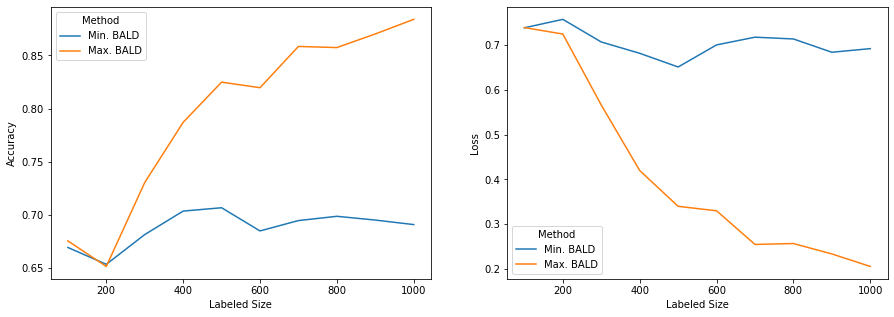

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

comb_frame = pd.concat([mean_min_frame, mean_max_frame])
sns.lineplot(ax=axes[0], data = comb_frame, x="labeled_size", y="acc", hue="Method")
axes[0].set_xlabel("Labeled Size")
axes[0].set_ylabel("Accuracy")

sns.lineplot(ax=axes[1], data = comb_frame, x="labeled_size", y="loss", hue="Method")
axes[1].set_xlabel("Labeled Size")
axes[1].set_ylabel("Loss")

In [154]:
mc_random_1 = pd.DataFrame(experiments["mc_dropout_random_1"])
mc_random_2 = pd.DataFrame(experiments["mc_dropout_random_2"])
mc_random_3 = pd.DataFrame(experiments["mc_dropout_random_3"])

mc_random_1 = mc_random_1.astype(types)
mc_random_2 = mc_random_2.astype(types)
mc_random_3 = mc_random_3.astype(types)

In [159]:
mean_random_frame = create_mean_frame(mc_random_1, mc_random_2, mc_random_3)
mean_random_frame.insert(0, "Method", "Random")

Text(0, 0.5, 'Accuracy')

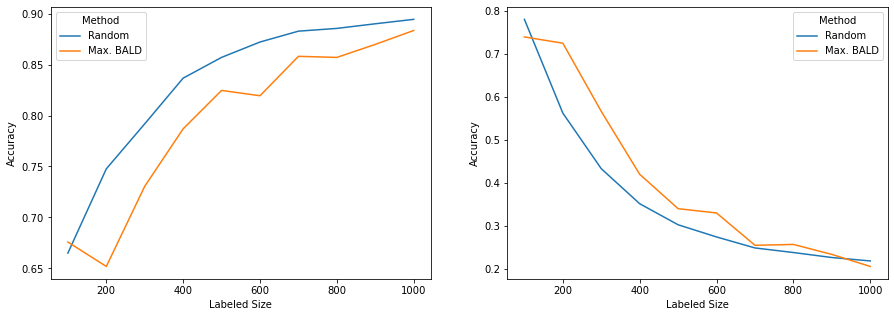

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

comb_frame = pd.concat([mean_random_frame, mean_max_frame], sort=True)
sns.lineplot(ax=axes[0], data = comb_frame, x="labeled_size", y="acc", hue="Method")
axes[0].set_xlabel("Labeled Size")
axes[0].set_ylabel("Accuracy")

sns.lineplot(ax=axes[1], data = comb_frame, x="labeled_size", y="loss", hue="Method")
axes[1].set_xlabel("Labeled Size")
axes[1].set_ylabel("Loss")